# 2. Assignment - Cluster
## 2.1 Intro
### 2.1.1 Student info
Student   $\;\;\;\;\;\;$: Felipe Camargo de Pauli  
Course    $\;\;\;\;\;\;\;$: Reconhecimento de padrões e aprendizado de máquina  
Professor $\;\;\;\;$: André E. Lazzaretti

### 2.1.2 Goal
Define the optime number of clusters in each dataset

### 2.1.3 Strategy
We will do the following steps:
1. Discover how to create a dataset with the numpy arrays for each feature
2. Explore the data  
   a. Look at the dataset  
   b. Use the scatterolotmatrix  
3. Guess the number of clusters
4. Use the model KMeans with:  
   a. Elbow method and analyze  
   b. Silhouette and analyze   
5. Repeat 4 with Hierarquic and dbscan models

### 2.1.4 Aux functions
The aux functions were created in a different file and will be imported here and used when necessary

## 2.2 Execution
### 2.2.1 Discover how to create a dataset with numpy arrays for each feature

In [65]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

First we have to convert the txt file in an numpy array object. We use the pd.read_csv, but not as we normally use it. That's because we don't have .csv files, but .txt. These files come with no headers and spaces separting themselves. Then we use delim_whitespace=True to remove the spaces and header=None to spread the data correctly.

In [66]:
df1 = pd.read_csv("./Dados/dataset1.txt", delim_whitespace=True, header=None).values;


This way we can see that the df1 is a numpy ndarray.

In [67]:
print(type(df1))
print(df1.shape)

<class 'numpy.ndarray'>
(2048, 8)


### 2.2.2 Exploring data 
After that, we have to figure out how many clusters are in the dataset. We can, first, use the simple scatter with the two first features.

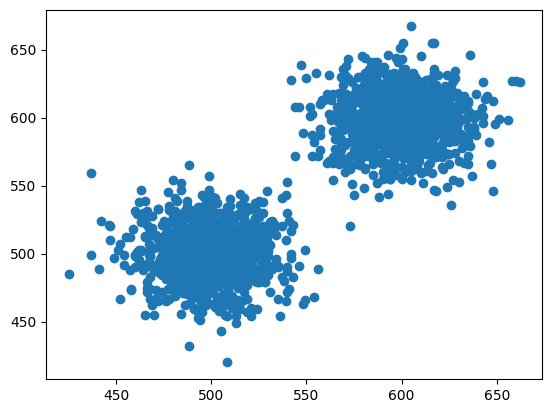

In [68]:
plt.scatter(df1[:, 0], df1[:, 1]);
plt.show()

Apperently there as two clusters. We're going to use another visual method to look it.

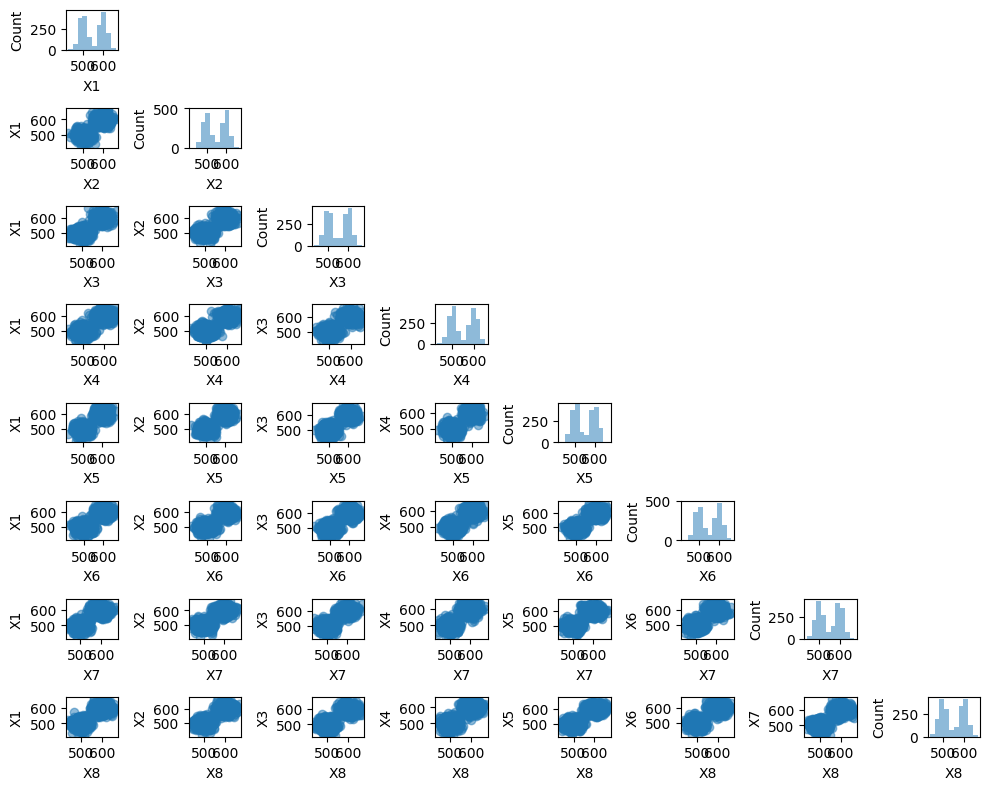

In [69]:
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df1, figsize=(10, 8), alpha=0.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

### 2.2.3 Guess the number of clusters
Ok! It looks like there are two clusters. Let's use the KMean method with two clusteres and see the results.

### 2.2.4 Use the model KMeans

In [70]:
from sklearn.cluster import KMeans

In [71]:
km = KMeans (
    n_clusters   = 2,
    init         = 'random',
    n_init       = 10,
    max_iter     = 300,
    tol          = 1e-4,
    random_state = 0
)

In [72]:
y_km = km.fit_predict (df1)
print(y_km)

[1 1 1 ... 0 0 0]


Let's look at the result of the model. We are going to plot and see if it makes sense.

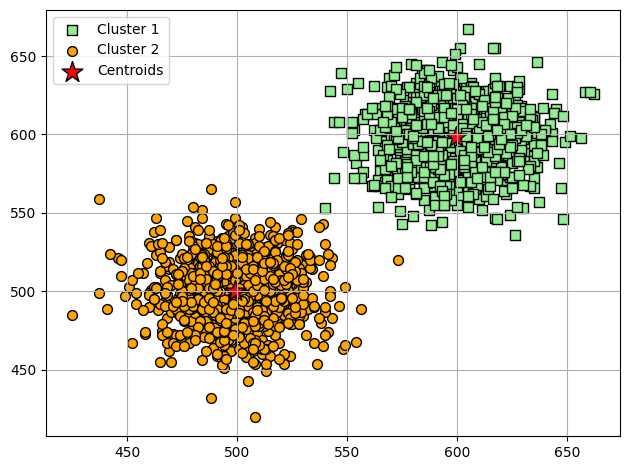

In [73]:
plt.scatter(df1[y_km == 0, 0],
            df1[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(df1[y_km == 1, 0],
            df1[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

It makes a lot of sense. Let's use the elbow and silhouette methods to confirm. 

In [74]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 6527511.59


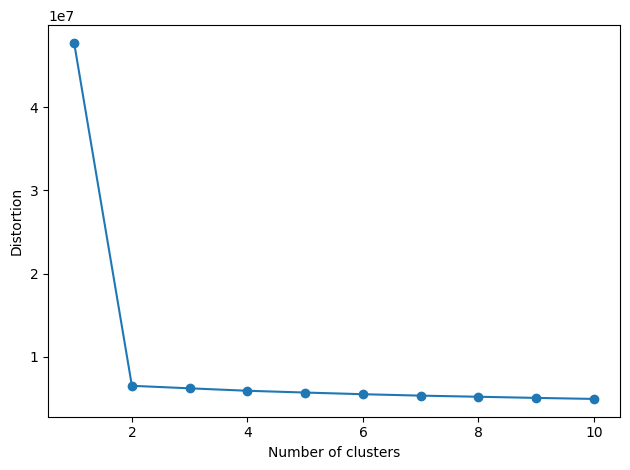

In [75]:
from utils.elbow import plot as elbow_plot
elbow_plot('KMeans', df1)

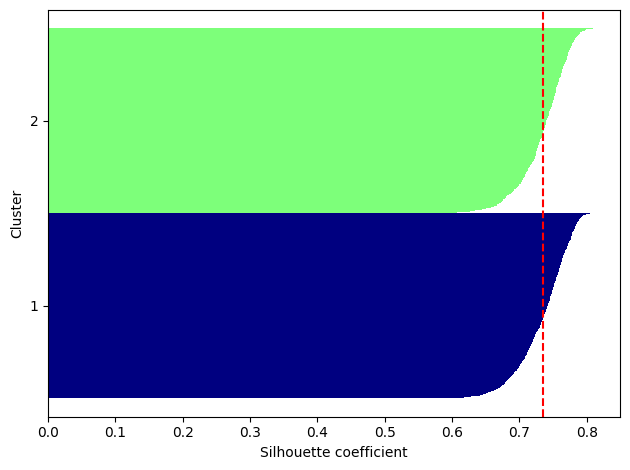

In [76]:
from utils.silhouette import plot as silhouette_plot
silhouette_plot('KMeans', 2, df1)

We can compare with 3 clusters.

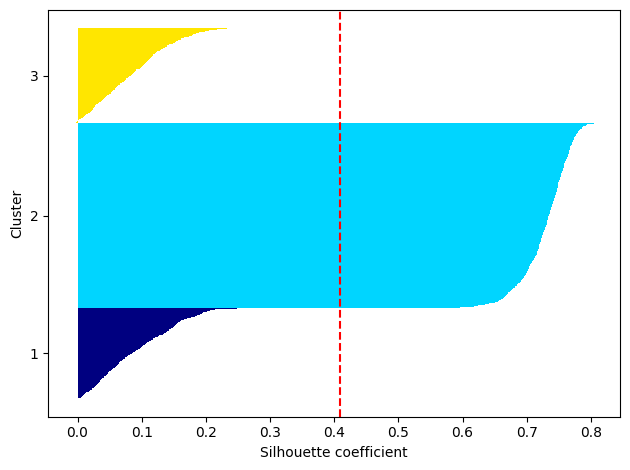

In [77]:
silhouette_plot('KMeans', 3, df1)

All evidences indicates there are two clusters.

### 2.2.5 Use the model Hierchical

C:\Users\fcdpa\AppData\Local\Temp\ipykernel_5508\1146545141.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


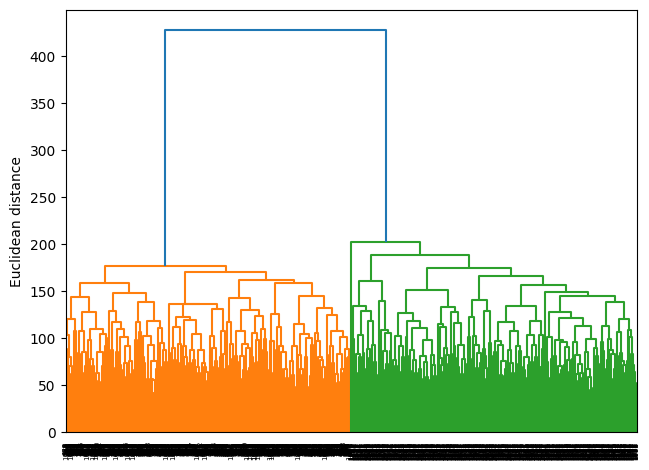

In [78]:

df1 = pd.read_csv("./Dados/dataset1.txt", delim_whitespace=True, header=None);

df = df1
# -----------------------
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')))
row_dist
# -----------------------
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])
# -----------------------
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])
# -----------------------
# 3. correct approach: Input matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()



In [79]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(df)
print('Cluster labels: %s' % labels)
print(ac)

Cluster labels: [1 1 1 ... 0 0 0]
AgglomerativeClustering(linkage='complete', n_clusters=3)


In [80]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0]


### Restart the process with each dataset

In [81]:
df2 = pd.read_csv("./Dados/dataset2.txt", delim_whitespace=True, header=None).values;
df3 = pd.read_csv("./Dados/dataset3.txt", delim_whitespace=True, header=None).values;
df4 = pd.read_csv("./Dados/dataset4.txt", delim_whitespace=True, header=None).values;

In [82]:
print(df2.shape) #  2.048 registers with    64 features
print(df3.shape) # 10.126 registers with    15 features
print(df4.shape) #  1.024 registers with 1.024 features

(2048, 64)
(10126, 15)
(1024, 1024)


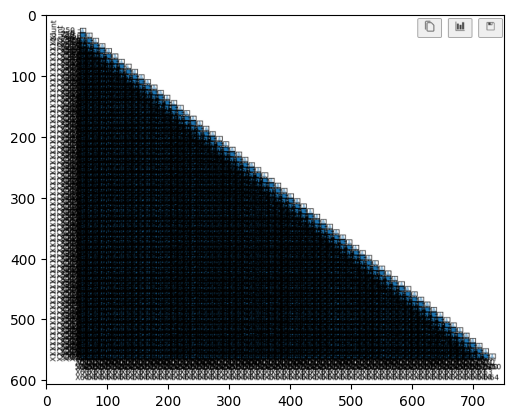

In [83]:
import matplotlib.image as mpimg
img = mpimg.imread('./scatter.png')
plt.imshow(img)

As we can see, there are a lot of pairs, and it takes a lot of time to process and doesn't give us any good information about the number of clusters. That's because there are too many features in the datasets. We have to use other methods: elbow and silhouette.

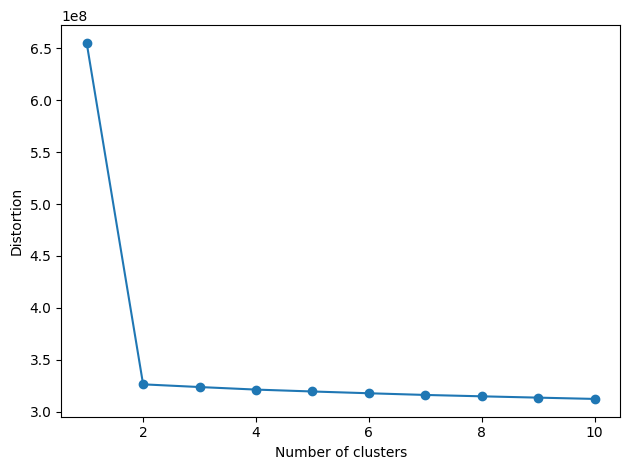

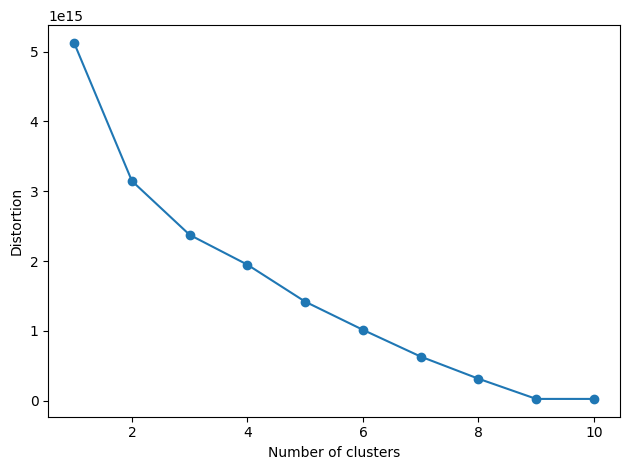

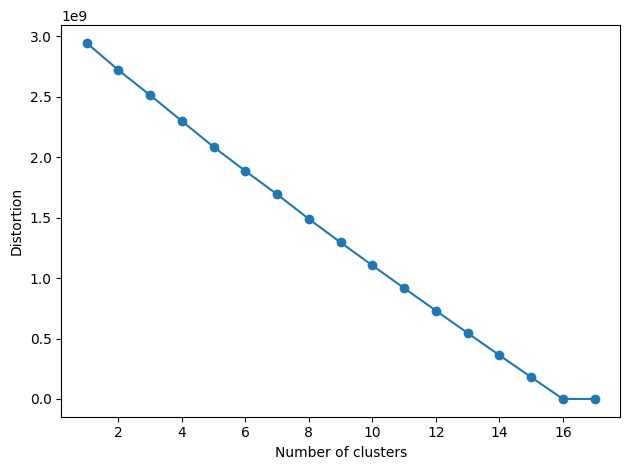

In [84]:
elbow_plot('KMeans', df2) # 2 clusters
elbow_plot('KMeans', df3) # 9 clusters
elbow_plot('KMeans', df4, max_range=18) # 16 clusters

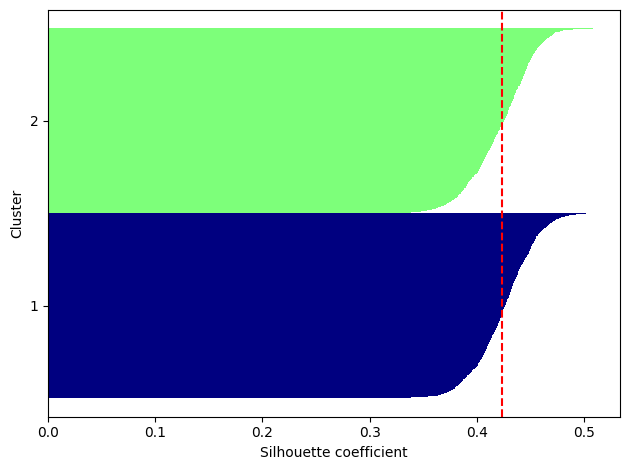

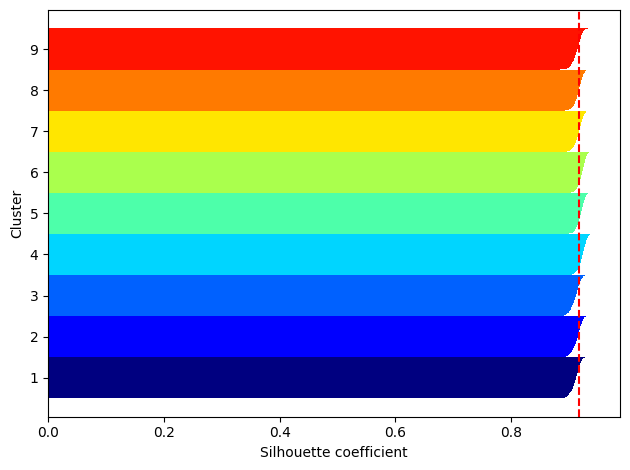

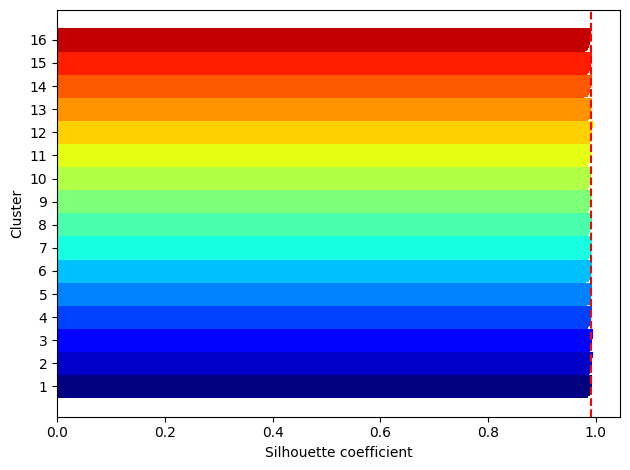

In [85]:
silhouette_plot ('KMeans',  2, df2) #  2 clusters
silhouette_plot ('KMeans',  9, df3) #  9 clusters
silhouette_plot ('KMeans', 16, df4) # 16 clusters


Ok, we have our conclusion.